In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### PCA, kNN (k=1)

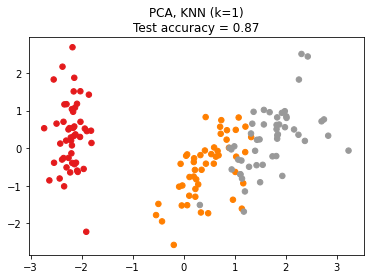

In [42]:
n_neighbors = 1
random_state = 0

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

pca.fit(X_train, y_train)
knn.fit(pca.transform(X_train), y_train)

acc_knn = knn.score(pca.transform(X_test), y_test)
X_embedded = pca.transform(X)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("PCA", n_neighbors, acc_knn))
plt.show()

### LDA, kNN (k=1)

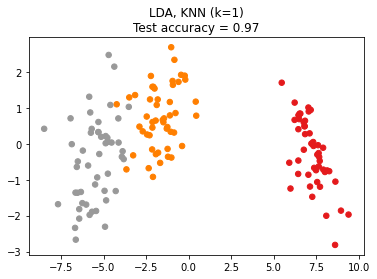

In [43]:
n_neighbors = 1
random_state = 0

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

lda.fit(X_train, y_train)
knn.fit(lda.transform(X_train), y_train)

acc_knn = knn.score(lda.transform(X_test), y_test)
X_embedded = lda.transform(X)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("LDA", n_neighbors, acc_knn))
plt.show()

### NCA, kNN (k=1)

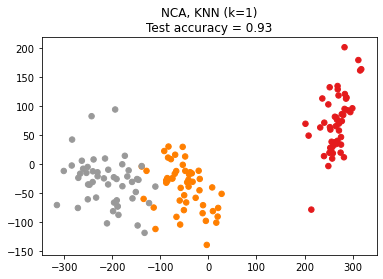

In [44]:
n_neighbors = 1
random_state = 0

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

nca.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)

acc_knn = knn.score(nca.transform(X_test), y_test)
X_embedded = nca.transform(X)

plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("NCA", n_neighbors, acc_knn))
plt.show()